# NetworkX
* reference
    * https://95pbj.tistory.com/34

In [59]:
import networkx as nx
import matplotlib.pyplot as plt

## Undirected Graph

In [2]:
# 객체 생성
g1 = nx.Graph()

In [3]:
# 노드 추가
g1.add_node('A')
g1.add_node(1)
g1.add_node(2)
g1.add_node(3)

g1.add_nodes_from([11, 22])

g1.nodes

NodeView(('A', 1, 2, 3, 11, 22))

In [4]:
# 노드 제거
g1.remove_node(3)

g1.nodes

NodeView(('A', 1, 2, 11, 22))

In [5]:
# 엣지 추가
g1.add_edge(1, 'A')
g1.add_edge(1, 2)
g1.add_edge(1, 22)

g1.add_edges_from([(1, 2), (1, 11)])

g1.edges

EdgeView([('A', 1), (1, 2), (1, 22), (1, 11)])

In [6]:
# 엣지 제거
g1.remove_edge(1, 22)

g1.edges

EdgeView([('A', 1), (1, 2), (1, 11)])

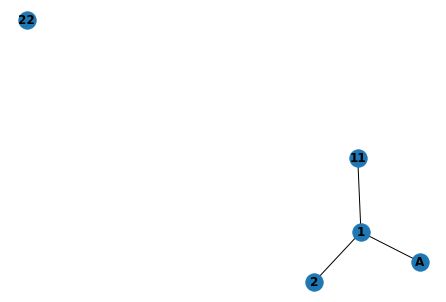

In [7]:
# 그래프 그리기
nx.draw(g1, with_labels = True, font_weight = 'bold')

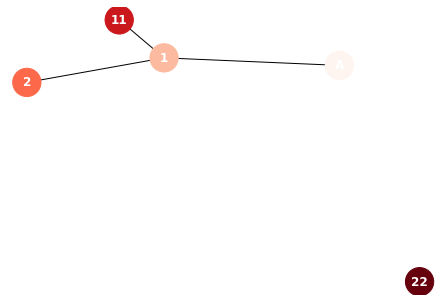

In [58]:
nx.draw(g1, with_labels = True, font_color = 'w', font_weight = 'bold',
        node_size = 800, node_color = range(g1.number_of_nodes()),
        cmap = plt.cm.Reds)

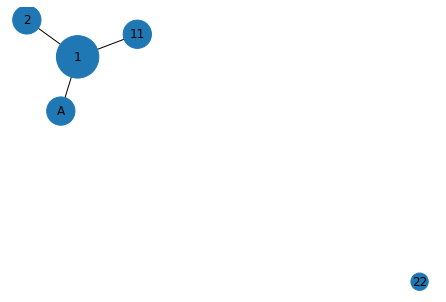

In [64]:
# degree 크기에 따른 node size 설정
d = dict(g1.degree)

nx.draw(g1, nodelist = d.keys(), node_size = [300 + v * 500 for v in d.values()],
        with_labels = True)

In [65]:
# 노드
g1.nodes

NodeView(('A', 1, 2, 11, 22))

In [66]:
# 엣지
g1.edges

EdgeView([('A', 1), (1, 2), (1, 11)])

In [67]:
# degree
g1.degree

DegreeView({'A': 1, 1: 3, 2: 1, 11: 1, 22: 0})

In [68]:
# 인접
g1.adj

AdjacencyView({'A': {1: {}}, 1: {'A': {}, 2: {}, 11: {}}, 2: {1: {}}, 11: {1: {}}, 22: {}})

In [71]:
# 노드 개수
g1.number_of_nodes()

5

In [72]:
# 엣지 개수
g1.number_of_edges()

3

In [73]:
# 그래프 정보
print(nx.info(g1))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 3
Average degree:   1.2000


## Directed Graph

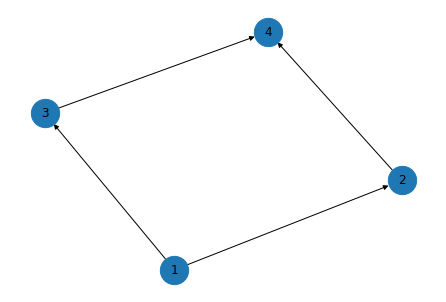

In [75]:
# 객체 생성
g2 = nx.DiGraph()

g2.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4)])

nx.draw(g2, with_labels = True, node_size = 800)

In [76]:
g2.degree

DiDegreeView({1: 2, 2: 2, 3: 2, 4: 2})

In [78]:
g2.in_degree

InDegreeView({1: 0, 2: 1, 3: 1, 4: 2})

In [79]:
g2.out_degree

OutDegreeView({1: 2, 2: 1, 3: 1, 4: 0})

## 가중치

{1: array([ 0.06247199, -0.4704525 ]), 2: array([ 0.93752801, -0.27985957]), 3: array([-1.        ,  0.75031208])}
{(1, 2): 3, (1, 3): 6, (2, 3): 4}


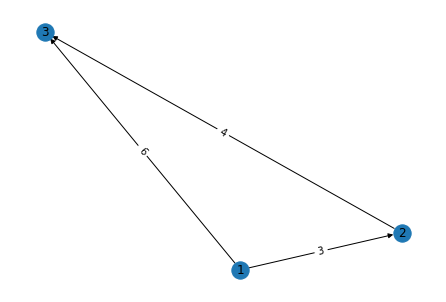

In [88]:
g3 = nx.DiGraph()

g3.add_weighted_edges_from([(1, 2, 3), (2, 3, 4)])
g3.add_edge(1, 3, weight = 6)

pos = nx.spring_layout(g3)
nx.draw(g3, pos = pos, with_labels = True)

labels = nx.get_edge_attributes(g3, 'weight')
nx.draw_networkx_edge_labels(g3, pos, edge_labels = labels)
print(pos)
print(labels)

## 판다스 데이터프레임 사용

In [90]:
import pandas as pd

df = pd.DataFrame({
    'from' : list('ABCAED'),
    'to' : list('DAECAE'),
    'weight' : [1, 2, 3, 4, 5, 6]
})
df

,from,to,weight
0,A,D,1
1,B,A,2
2,C,E,3
3,A,C,4
4,E,A,5
5,D,E,6


{('A', 'D'): Text(-0.18867743554136016, 0.12543440729345628, '1'),
 ('A', 'C'): Text(-0.7624624562487063, 0.203618923196196, '4'),
 ('D', 'E'): Text(0.2624624562487063, -0.0026258037751774044, '6'),
 ('B', 'A'): Text(0.07209274193108439, -0.30249663135658456, '2'),
 ('C', 'E'): Text(-0.3113225644586399, 0.07555871212756232, '3'),
 ('E', 'A'): Text(-0.4046746243477648, -0.33106723493976603, '5')}

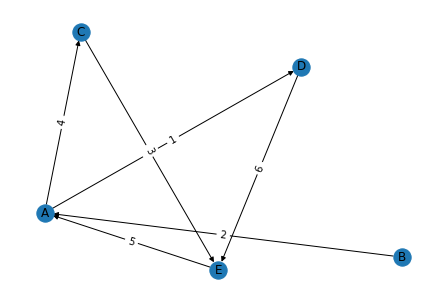

In [95]:
g = nx.from_pandas_edgelist(df, 'from', 'to', 'weight',
                            create_using = nx.DiGraph())

pos = nx.spring_layout(g)
nx.draw(g, pos = pos, with_labels = True)

labels = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = labels)